In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Run naive bayse classifier in P1_1.ipynb

In [3]:
import P1_1

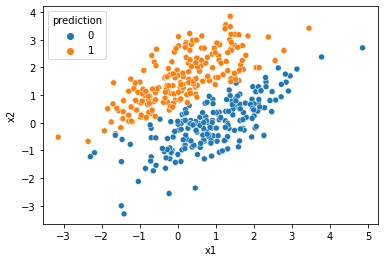

In [3]:
preds, posts, errs = P1_1.Run_myNB(10, 500)

In [4]:
#mean accuracy of 10 iteration
np.mean(errs, axis = 0)

array([0.9455    , 0.94899138, 0.94725   ])

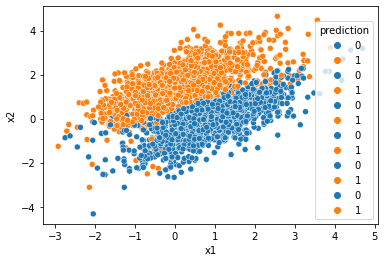

In [5]:
#Run with changing sample size
err_lst = []
for sample_size in [10, 20, 50, 100, 300, 500]:
    preds, posts, errs = P1_1.Run_myNB(10, sample_size)
    errs = np.mean(errs, axis = 0)
    err_lst.append(errs)

In [16]:
#create data frame for contain accuracy, precision, recall
err_df = pd.DataFrame(err_lst)
err_df.columns = ['Accuracy', 'Precision', 'Recall']
err_df.index = ['10', '20', '50', '100', '300', '500']
err_df

,Accuracy,Precision,Recall
10,0.9085,0.865320,0.87750
20,0.9170,0.896940,0.90275
50,0.9440,0.930272,0.93625
100,0.9290,0.937140,0.93300
300,0.9350,0.943625,0.93950
500,0.9535,0.946104,0.94950


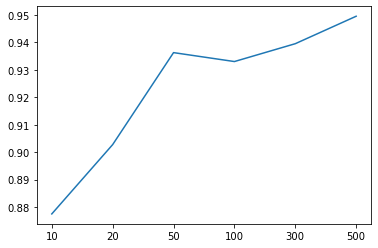

In [19]:
#plot result 
plt.plot(err_df['Recall']) # 'Accuracy', 'Precision'

### P1_2

In [1]:
import pandas as pd
import P1_2

In [4]:

#Prepare data set

FILEPATH = "./nbastat2021.xlsx"

data = pd.read_excel(FILEPATH)
#data.columns

#Change columns name
data.columns = [
    'Name', 'Team', 'GP', 'MPG', 'FT%', '2P%', '3P%',
    'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'TOP', 'POS'             
                 ]

#Create simple dataframe
df = data[['FT%', '2P%', '3P%', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'TOP', 'POS']]
df.head()

,FT%,2P%,3P%,PPG,RPG,APG,SPG,BPG,TOP,POS
0,0.589,0.457,0.362,8.6,6.8,1.1,0.52,0.56,1.18,F
1,0.544,0.557,0.000,7.2,9.9,3.2,0.82,0.76,1.55,C
2,0.754,0.549,0.000,19.0,10.3,3.5,1.50,0.78,2.70,F-C
3,0.873,0.580,0.311,13.5,5.6,0.9,0.31,1.02,0.93,F-C
4,0.722,0.434,0.311,12.8,3.3,2.8,0.82,0.38,1.70,G


In [5]:
# Str type label to Int type label
df['POS'] = P1_2.Str_to_ID(df['POS'])

/var/folders/ks/zdzpzdss37j5m0f27_d5d7qh0000gn/T/ipykernel_39480/630500782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS'] = P1_2.Str_to_ID(df['POS'])


In [6]:
# Split original data to six
split_df = P1_2.cross_validation_split(df, 6)

In [7]:
cross_validation_train = []
cross_validation_test = []

#Make six different set (train : test = 5:1) to cross-validation

for i in range(6):
    cross_validation_test.append(split_df[i])
    train_df = []
    for j in range(5):
        idx = i + j + 1
        if idx > 5:
            idx = idx-6
        train_df += split_df[idx]
    cross_validation_train.append(train_df)

In [8]:
#Run myNB 6 times and get average error

mean_error = 0
for i in range(6):
    train = pd.DataFrame(cross_validation_train[i])
    test = pd.DataFrame(cross_validation_test[i])

    X_train = train.iloc[:,0:9]
    Y_train = train.iloc[:,9]

    X_test = test.iloc[:,0:9]
    Y_test = test.iloc[:,9]

    pred, post, error = P1_2.MultiClass_myNB(X_train, Y_train, X_test, Y_test)
    mean_error += error / 6
print(mean_error)

0.5375
